In [1]:
import numpy as np
import numpy.random as npr
from numpy.random import dirichlet, uniform
from scipy.stats import beta, norm, bernoulli
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import beta as Beta
from tqdm import tqdm_notebook as tqdm
from scipy.stats import beta
from scipy.special import roots_legendre
from easydict import EasyDict as edict
import multiprocessing as mp
%matplotlib inline

In [2]:
from utils import ESSJS_beta, ESS_UIPD_beta

### Parameters

In [3]:
ns = [80, 100, 120]
n = 100
Ms = np.arange(10, 200, step=10)

### Binary data

In [4]:
ps_range = [0.4, 0.6]
p = 0.5
pss = uniform(ps_range[0], ps_range[1], size=(100, 3))

In [5]:
nESSs = []
for ps in tqdm(pss):
    nESS = ESSJS_beta(M=1, ns=ns, ps=ps, n=n, p=p)
    nESSs.append(nESS)
nESSs = np.array(nESSs)

In [10]:
Ms = np.arange(10, 200, step=10)
ESSsM = []
for M in Ms:
    ESSsM.append(M*(nESSs + 1) - 1)
ESSsM = np.array(ESSsM)

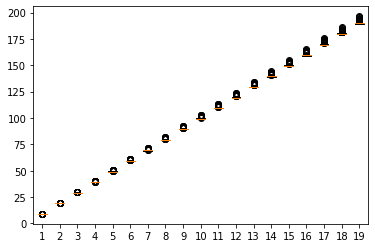

In [15]:
_ = plt.boxplot(np.transpose(ESSsM))

### ESS for UIP-D

In [8]:
ps = pss[0]
Ds = [ bernoulli.rvs(ps[i], size=ns[i]) for i in range(len(ns))]
ESSUIPD = ESS_UIPD_beta(ns=ns, Ds=Ds, n=n, M=20, C=1e6)
ESSUIPD.getESS()

In [188]:
ESSs = []
for ps in tqdm(pss):
    Ds = [ bernoulli.rvs(ps[i], size=ns[i]) for i in range(len(ns))]
    ESSUIPD = ESS_UIPD_beta(ns=ns, Ds=Ds, n=n, M=100, C=1e6)
    ESSUIPD.getESS()
    ESSs.append(ESSUIPD.res.ESS)

In [189]:
np.mean(ESSs)

77.72

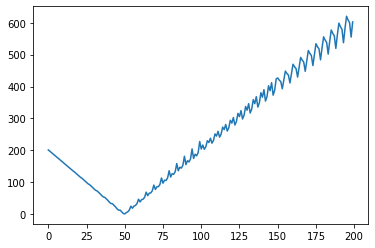

In [186]:
plt.plot(ESSUIPD.res["diffs"])

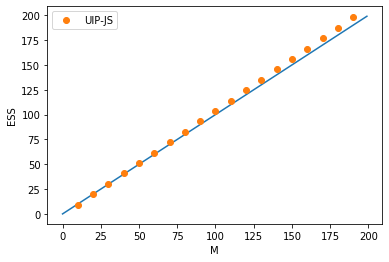

In [98]:
plt.plot(np.arange(200), np.arange(200))
plt.plot(Ms, ESSsM, "o", label="UIP-JS")
plt.legend()
plt.xlabel("M")
_ = plt.ylabel("ESS")